# Data assimilation with 4DVar

In [1]:
# tutaj jakaś teoria, ładne wzorki itp

In [2]:
# nie dodawałem analizy wrażliwości, myślę że przed 4dvar dla obu modeli

### 4d var with Lorenz 63 model

![Lorenz equations](images/lorenz.png)

source: https://en.wikipedia.org/wiki/Lorenz_system

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D


In [4]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

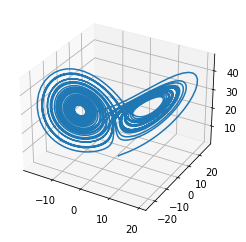

In [5]:
def f(state, _):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

[Dokumentacja](https://docs.salome-platform.org/latest/gui/ADAO/en/ref_algorithm_4DVAR.html)

In [6]:
from data_assimilation import assimilate

In [7]:
# fixme uzupełnic
xb = [1., 1., 1.]
error_vector = [10., 10., 10.]

### SEIR epidemic model

![SEIR epidemic model](images/seir.png)

S = S - S \* beta \* I / N  
E = E + S \ * beta \* I / N - eps \* E  
I = I + eps \* E - (alfa + gamma) \* I  
R = R + gamma \* I  
D = alfa \* I  

In [8]:
def evolution_function(state):
    """
    D = alfa * I
    S = S - S*beta*I/N
    E = E + S*beta*I/N - eps*E
    I = I + eps*E - (alfa+gamma)*I
    R = R + gamma*I
    """
    state = list(np.ravel(state))
    state = map(lambda x : max(x, 0), state)
    S_old, E_old, I_old, R_old, D_old, alfa, beta, eps, gamma = state

    N = S_old + E_old + I_old + R_old
    D = D_old + alfa * I_old
    S = S_old - S_old * beta * I_old / N
    E = E_old + S_old * beta * I_old / N - eps * E_old
    I = I_old + eps * E_old - (alfa + gamma) * I_old
    R = R_old + gamma * I_old

    results = [S, E, I, R, D, alfa, beta, eps, gamma]
    return np.array(results).reshape(-1, 1)

In [9]:
def observation_operator(state):
    D = state.reshape((-1, 9))[:, 4]
    return D

In [10]:
params = [8.96545184e-04, 5.43525126e-01, 8.58683367e-01, 4.33096921e-01]
seird = [100000, 100, 0, 0, 0]
state = np.array(seird + params).reshape(-1, 1)

In [11]:
from data_assimilation import prepare_obs
yobs = prepare_obs(state, observation_operator, evolution_function)

In [13]:
error_vector = [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.5, 0.5, 0.5]
assimilate(seird + [0.01, 0.1, 0.1, 0.1], yobs, observation_operator, evolution_function, error_vector, verbose=True)

  Intermediate CurrentState at the current iteration: [1.e+05 1.e+02 0.e+00 0.e+00 0.e+00 1.e-02 1.e-01 1.e-01 1.e-01]
  Intermediate CostFunctionJb at the current iteration: 0.0
  Intermediate CostFunctionJo at the current iteration: 123145.84117550147
  Intermediate CostFunctionJ at the current iteration: 123145.84117550147
  Intermediate IndexOfOptimum at the current iteration: 0
  Intermediate CurrentOptimum at the current iteration: [1.e+05 1.e+02 0.e+00 0.e+00 0.e+00 1.e-02 1.e-01 1.e-01 1.e-01]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 123145.84117550147
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.0
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 123145.84117550147
  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000119e+02  1.28550517e-04 -2.05926782e-07
  3.13170856e-04  9.53951136e-01  3.06113715e-01  1.52688339e-01
 -1.52383040e-01]
  Intermediate CostFunctionJb at t

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000002e+02 -2.56939223e-06 -1.32598233e-09
 -4.93116734e-05  5.84782421e-03  1.26126908e-01  9.89262513e-02
  7.30386211e-02]
  Intermediate CostFunctionJb at the current iteration: 0.0014537978412235931
  Intermediate CostFunctionJo at the current iteration: 20189.785167179984
  Intermediate CostFunctionJ at the current iteration: 20189.786620977826
  Intermediate IndexOfOptimum at the current iteration: 9
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00000002e+02 -1.09518478e-06 -1.65748399e-09
 -2.96601030e-05  7.67441728e-03  1.16392837e-01  9.92402744e-02
  8.31683288e-02]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 16346.196239097093
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.0005661326815715271
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 16346.195672964412
  Intermediate CurrentState at the

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000002e+02 -2.26520373e-06 -1.44419718e-09
 -4.56508396e-05  5.54618568e-03  1.24267547e-01  9.89264561e-02
  7.50098657e-02]
  Intermediate CostFunctionJb at the current iteration: 0.001264174766921327
  Intermediate CostFunctionJo at the current iteration: 6650.563226563502
  Intermediate CostFunctionJ at the current iteration: 6650.564490738269
  Intermediate IndexOfOptimum at the current iteration: 19
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00000002e+02 -2.26520373e-06 -1.44419718e-09
 -4.56508396e-05  5.54618568e-03  1.24267547e-01  9.89264561e-02
  7.50098657e-02]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 6650.564490738269
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.001264174766921327
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 6650.563226563502
  Intermediate CurrentState at the curr

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000005e+02 -2.30897097e-06 -1.83371423e-09
 -4.93936789e-05  5.89440784e-03  1.19642757e-01  8.35110594e-02
  6.76740900e-02]
  Intermediate CostFunctionJb at the current iteration: 0.0017448396065136492
  Intermediate CostFunctionJo at the current iteration: 6553.534473101811
  Intermediate CostFunctionJ at the current iteration: 6553.536217941418
  Intermediate IndexOfOptimum at the current iteration: 28
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00000005e+02 -2.30897097e-06 -1.83371423e-09
 -4.93936789e-05  5.89440784e-03  1.19642757e-01  8.35110594e-02
  6.76740900e-02]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 6553.536217941418
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.0017448396065136492
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 6553.534473101811
  Intermediate CurrentState at the cu

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000013e+02 -1.81979209e-06 -3.01914502e-09
 -5.13807472e-05  7.00356114e-03  1.08683642e-01  6.21950888e-02
  5.47974196e-02]
  Intermediate CostFunctionJb at the current iteration: 0.003570350869374934
  Intermediate CostFunctionJo at the current iteration: 6323.439263953785
  Intermediate CostFunctionJ at the current iteration: 6323.442834304654
  Intermediate IndexOfOptimum at the current iteration: 37
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00000013e+02 -1.81979209e-06 -3.01914502e-09
 -5.13807472e-05  7.00356114e-03  1.08683642e-01  6.21950888e-02
  5.47974196e-02]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 6323.442834304654
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.003570350869374934
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 6323.439263953785
  Intermediate CurrentState at the curr

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000038e+02  8.14619338e-07 -7.73894744e-09
 -4.89161334e-05  8.49143823e-03  7.39716502e-02  3.03215496e-02
  1.73368274e-02]
  Intermediate CostFunctionJb at the current iteration: 0.012371470319057186
  Intermediate CostFunctionJo at the current iteration: 7464.400152937854
  Intermediate CostFunctionJ at the current iteration: 7464.412524408172
  Intermediate IndexOfOptimum at the current iteration: 45
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00000020e+02 -1.23657162e-06 -4.35747269e-09
 -5.31565177e-05  7.51481896e-03  9.90743537e-02  4.92484073e-02
  4.22951507e-02]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 6067.20028174683
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.005921887136150284
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 6067.194359859694
  Intermediate CurrentState at the curre

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000047e+02  1.97785336e-06 -9.43983720e-09
 -4.24211912e-05  8.79014664e-03  6.09016833e-02  2.76715427e-02
  8.07246489e-03]
  Intermediate CostFunctionJb at the current iteration: 0.015214435237826701
  Intermediate CostFunctionJo at the current iteration: 5211.403400290208
  Intermediate CostFunctionJ at the current iteration: 5211.418614725446
  Intermediate IndexOfOptimum at the current iteration: 55
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00000047e+02  1.97785336e-06 -9.43983720e-09
 -4.24211912e-05  8.79014664e-03  6.09016833e-02  2.76715427e-02
  8.07246489e-03]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 5211.418614725446
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.015214435237826701
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 5211.403400290208
  Intermediate CurrentState at the curr

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000060e+02  3.40525128e-06 -1.20366990e-08
 -3.19992846e-05  9.79850925e-03  3.97779303e-02  2.01800397e-02
 -6.34780816e-03]
  Intermediate CostFunctionJb at the current iteration: 0.021307904874417135
  Intermediate CostFunctionJo at the current iteration: 23459.412904771507
  Intermediate CostFunctionJ at the current iteration: 23459.43421267638
  Intermediate IndexOfOptimum at the current iteration: 63
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00000050e+02  2.33268373e-06 -1.00219735e-08
 -4.04386660e-05  8.96946596e-03  5.63048996e-02  2.58179621e-02
  4.62562836e-03]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 5109.627635744158
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.016511183005989888
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 5109.611124561153
  Intermediate CurrentState at the cur

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000053e+02  2.60626954e-06 -1.05322330e-08
 -3.82657633e-05  9.18784474e-03  5.20989882e-02  2.43827550e-02
  1.86219978e-03]
  Intermediate CostFunctionJb at the current iteration: 0.01764517268313415
  Intermediate CostFunctionJo at the current iteration: 4982.886376037448
  Intermediate CostFunctionJ at the current iteration: 4982.904021210131
  Intermediate IndexOfOptimum at the current iteration: 73
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00000053e+02  2.60626954e-06 -1.05322330e-08
 -3.82657633e-05  9.18784474e-03  5.20989882e-02  2.43827550e-02
  1.86219978e-03]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 4982.904021210131
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.01764517268313415
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 4982.886376037448
  Intermediate CurrentState at the curren

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000054e+02  2.81356706e-06 -1.09049688e-08
 -3.65423356e-05  9.37962503e-03  4.89491410e-02  2.33062926e-02
 -9.59972514e-05]
  Intermediate CostFunctionJb at the current iteration: 0.018508307346797728
  Intermediate CostFunctionJo at the current iteration: 4899.912284313923
  Intermediate CostFunctionJ at the current iteration: 4899.93079262127
  Intermediate IndexOfOptimum at the current iteration: 81
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00000054e+02  2.79519343e-06 -1.08719317e-08
 -3.66950901e-05  9.36262675e-03  4.92283249e-02  2.34017039e-02
  7.75657893e-05]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 4896.039861382457
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.01843059195556868
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 4896.021430790502
  Intermediate CurrentState at the curren

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000056e+02  2.29684349e-06 -1.13115696e-08
 -3.05376694e-05  1.02200475e-02  4.37499955e-02  2.33850554e-02
 -7.98217400e-05]
  Intermediate CostFunctionJb at the current iteration: 0.019050025154515177
  Intermediate CostFunctionJo at the current iteration: 4668.457528545885
  Intermediate CostFunctionJ at the current iteration: 4668.47657857104
  Intermediate IndexOfOptimum at the current iteration: 90
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00000056e+02  2.74031570e-06 -1.11777509e-08
 -3.20816580e-05  1.02488203e-02  4.50819544e-02  2.27320120e-02
  2.20337082e-05]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 4664.126411012876
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.018982102989437893
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 4664.107428909886
  Intermediate CurrentState at the curre

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000055e+02  2.29385043e-06 -1.10593548e-08
 -3.34158629e-05  1.06193146e-02  4.62186956e-02  2.19230251e-02
  8.80096753e-06]
  Intermediate CostFunctionJb at the current iteration: 0.01898766239357261
  Intermediate CostFunctionJo at the current iteration: 4629.166367630252
  Intermediate CostFunctionJ at the current iteration: 4629.185355292646
  Intermediate IndexOfOptimum at the current iteration: 100
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00000055e+02  2.29385043e-06 -1.10593548e-08
 -3.34158629e-05  1.06193146e-02  4.62186956e-02  2.19230251e-02
  8.80096753e-06]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 4629.185355292646
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.01898766239357261
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 4629.166367630252
  Intermediate CurrentState at the curre

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000053e+02 -1.58689890e-06 -1.05340098e-08
 -3.92876489e-05  1.21496231e-02  5.13867730e-02  1.89174156e-02
  1.65854981e-05]
  Intermediate CostFunctionJb at the current iteration: 0.018945888663567844
  Intermediate CostFunctionJo at the current iteration: 4578.485287802494
  Intermediate CostFunctionJ at the current iteration: 4578.504233691157
  Intermediate IndexOfOptimum at the current iteration: 109
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00000053e+02 -1.58689890e-06 -1.05340098e-08
 -3.92876489e-05  1.21496231e-02  5.13867730e-02  1.89174156e-02
  1.65854981e-05]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 4578.504233691157
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.018945888663567844
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 4578.485287802494
  Intermediate CurrentState at the cur

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000052e+02 -1.54291840e-05 -9.95790030e-09
 -4.60949064e-05  1.39121587e-02  5.75582055e-02  1.64883107e-02
 -5.57554760e-05]
  Intermediate CostFunctionJb at the current iteration: 0.01882495005087151
  Intermediate CostFunctionJo at the current iteration: 4546.636005966621
  Intermediate CostFunctionJ at the current iteration: 4546.654830916672
  Intermediate IndexOfOptimum at the current iteration: 118
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00000052e+02 -1.54291840e-05 -9.95790030e-09
 -4.60949064e-05  1.39121587e-02  5.75582055e-02  1.64883107e-02
 -5.57554760e-05]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 4546.654830916672
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.01882495005087151
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 4546.636005966621
  Intermediate CurrentState at the curre

  Intermediate CurrentState at the current iteration: [ 1.00000000e+05  1.00000052e+02 -2.55769970e-05 -9.65085849e-09
 -4.98662505e-05  1.48002470e-02  6.10255967e-02  1.54956022e-02
 -9.21861404e-05]
  Intermediate CostFunctionJb at the current iteration: 0.018736078041740253
  Intermediate CostFunctionJo at the current iteration: 4542.063599303056
  Intermediate CostFunctionJ at the current iteration: 4542.082335381098
  Intermediate IndexOfOptimum at the current iteration: 127
  Intermediate CurrentOptimum at the current iteration: [ 1.00000000e+05  1.00000052e+02 -2.55769970e-05 -9.65085849e-09
 -4.98662505e-05  1.48002470e-02  6.10255967e-02  1.54956022e-02
 -9.21861404e-05]
  Intermediate CostFunctionJAtCurrentOptimum at the current iteration: 4542.082335381098
  Intermediate CostFunctionJbAtCurrentOptimum at the current iteration: 0.018736078041740253
  Intermediate CostFunctionJoAtCurrentOptimum at the current iteration: 4542.063599303056
  Intermediate CurrentState at the cur

### Assimilation of actual data

In [ ]:
from data_assimilation import load_data
yobs = load_data(size = 100, country = 'POL')

In [ ]:
assimilate(seird + [0.01, 0.1, 0.1, 0.1], yobs, observation_operator, evolution_function, error_vector, verbose=True)